In [9]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture as gm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
import scipy as sp

import pandas as pd

In [10]:
path = '/Users/emmadionne/Documents/'
file = 'test_angs_mags_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   mov.mean  mov.std  mov.mode  mov.range  mov.eventrest  mov.maxeventval  \
0       0.0      0.0      3675        0.0              0              0.0   
1       0.0      0.0      3675        0.0              0              0.0   
2       0.0      0.0      3675        0.0              0              0.0   
3       0.0      0.0      3675        0.0              0              0.0   
4       0.0      0.0      3675        0.0              0              0.0   

   mov.surfarea  mov.totalmag  mov.firstder  mov.secder  ...  mov.timetoevent  \
0             0           0.0           0.0         0.0  ...              114   
1             0           0.0           0.0         0.0  ...              113   
2             0           0.0           0.0         0.0  ...              112   
3             0           0.0           0.0         0.0  ...              111   
4             0           0.0           0.0         0.0  ...              110   

   move.timefromevent  brain.data  brain.eventrest

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [11]:
%matplotlib inline

col_list = list(data)
#puts the paramter on a scale of 0 to 1
datacopy = data.copy()
datacopy -= datacopy.min()
datacopy /= datacopy.max()
data = datacopy.fillna(value=0)

In [12]:
indices = []
for i in range(len(data["mov.mean"])):
    if i >= 1445 and i < 2388:
        indices.append(1)
    else:
        indices.append(0)

data = data.astype('float64')
a = np.zeros(len(data))
a[1445:2388]=1
data['classification'] = a

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


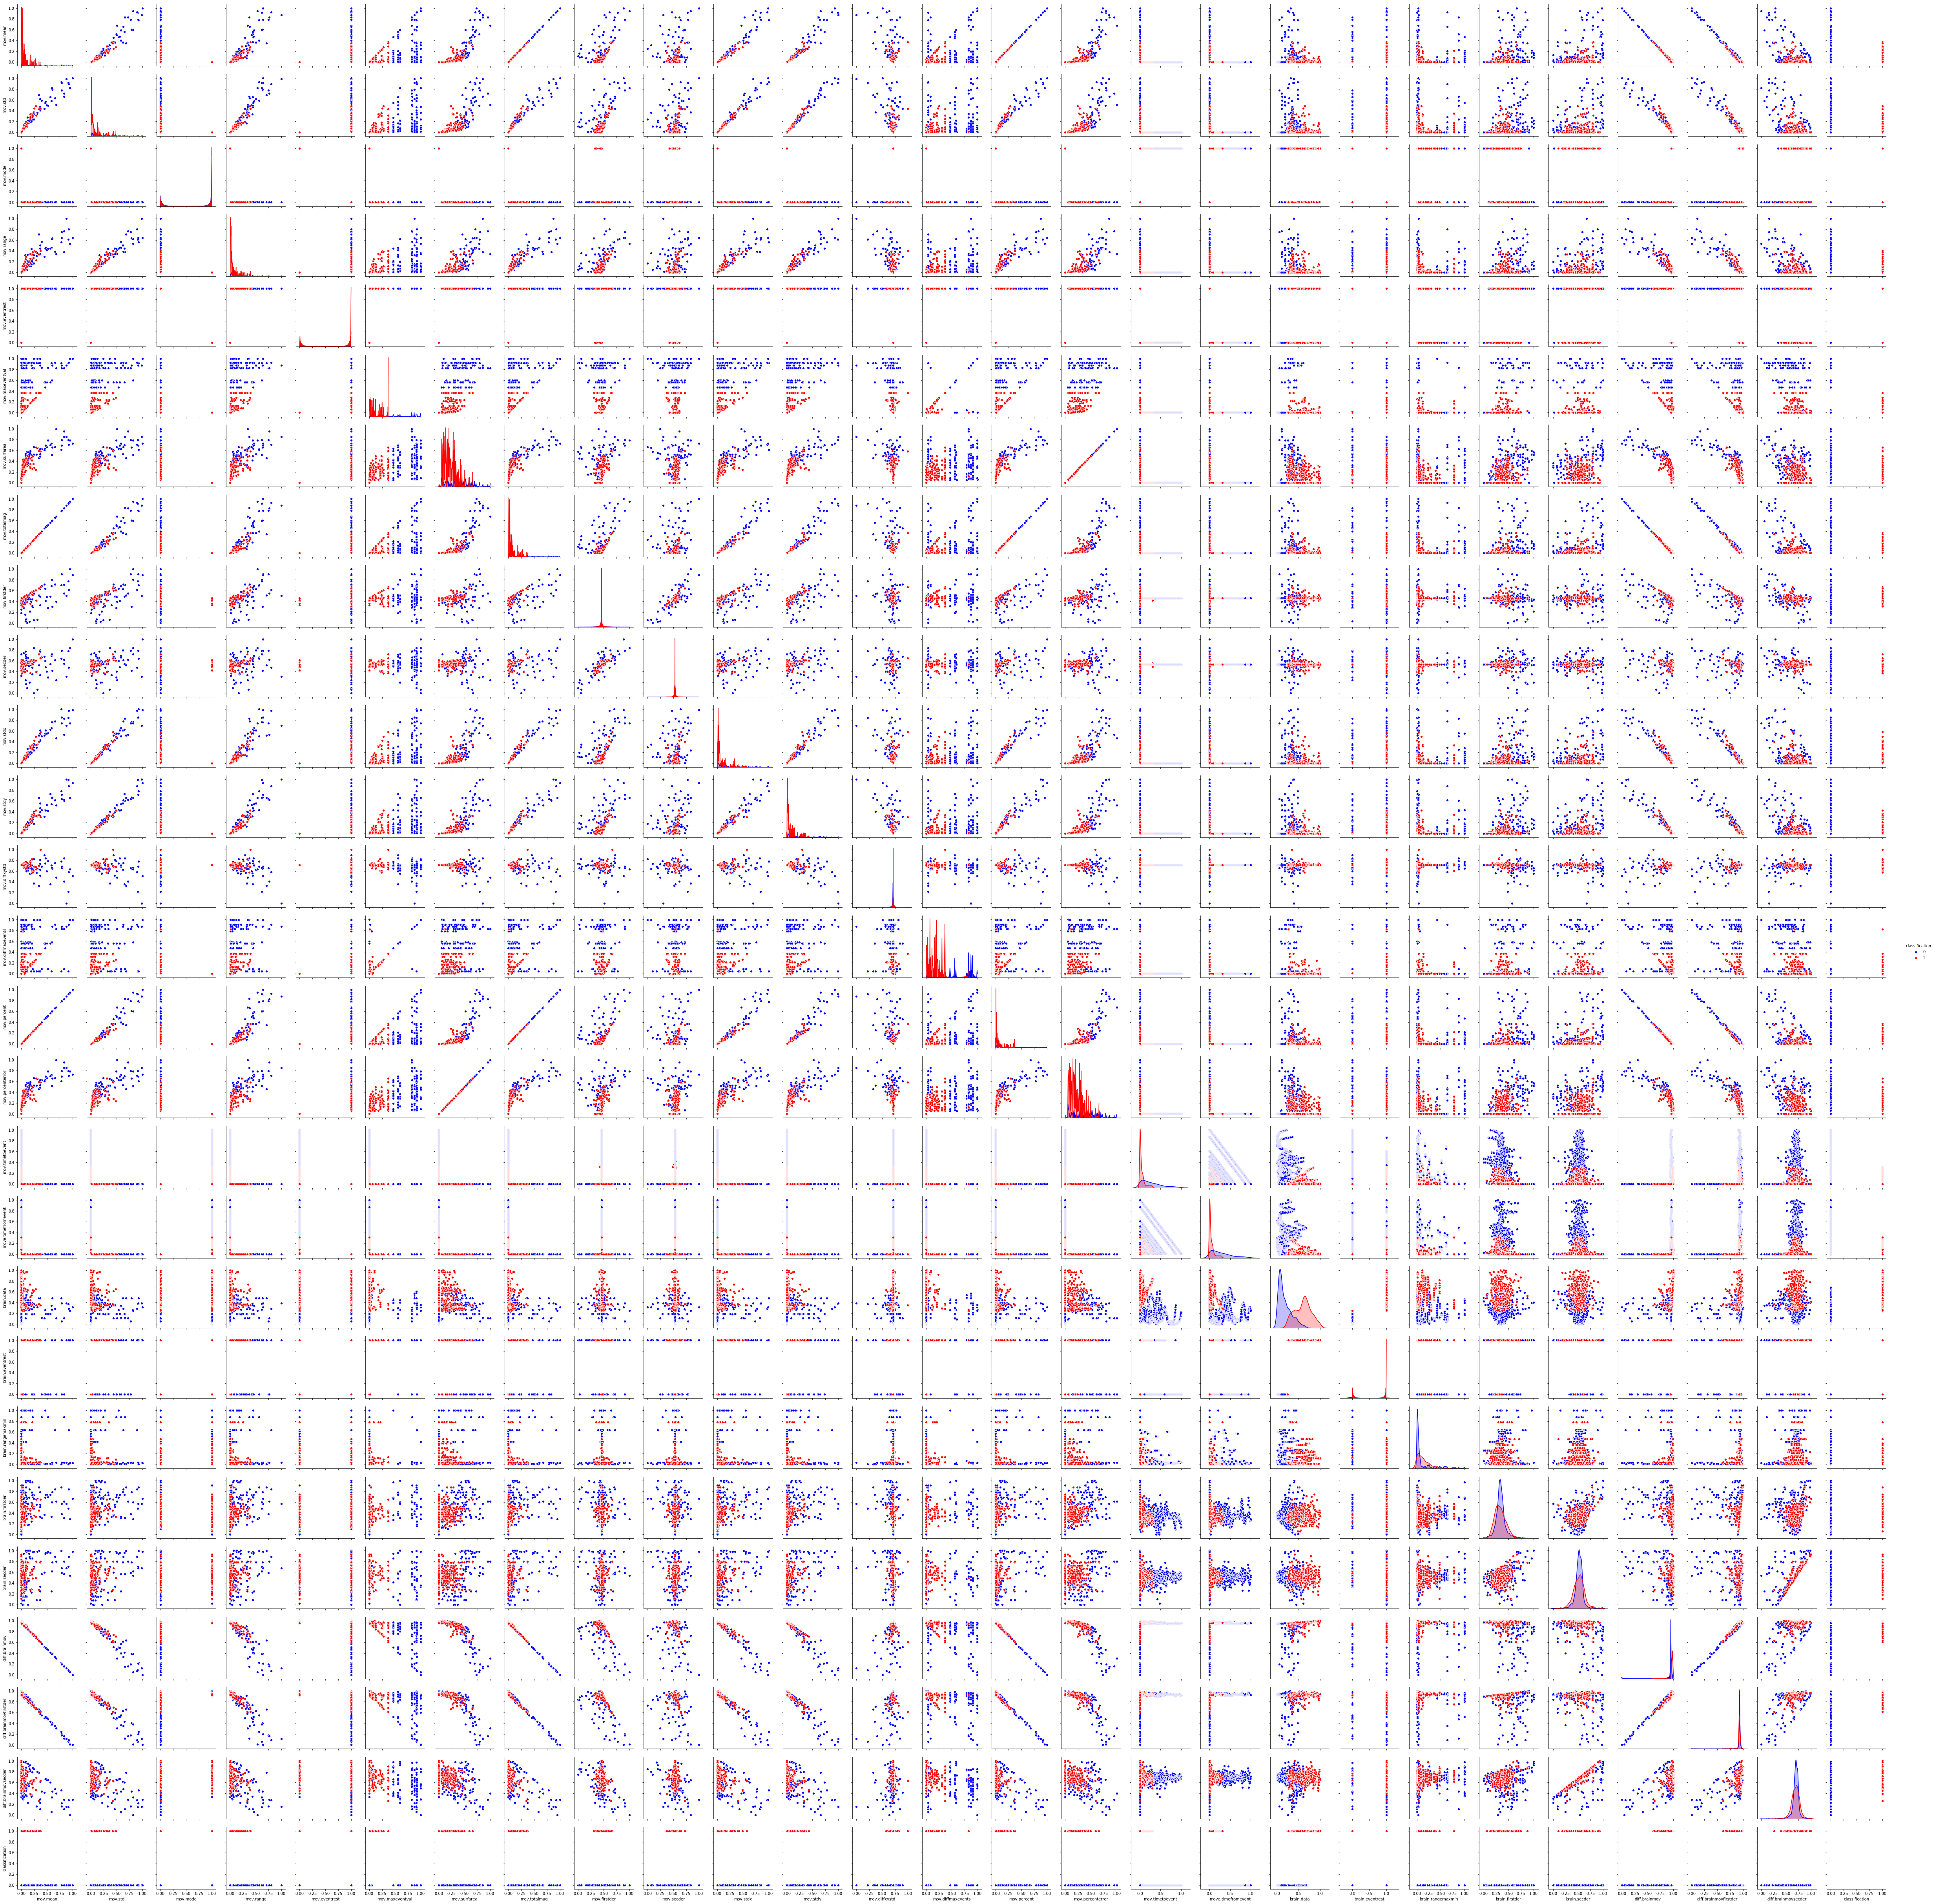

In [13]:
c = ["blue", "red"]
sns.pairplot(data, 
             diag_kind="kde", 
             markers=["o", "o"], 
             hue_order = [0, 1], hue='classification', palette = c)
plt.savefig('/Users/emmadionne/Documents/metrics_small_twitch_pairplot.png')

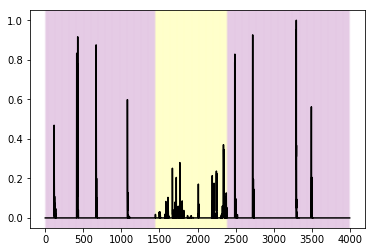

In [14]:
def plot_classification(data, indices, color):
    colors_list = ["violet", "magenta", "teal", "silver", "salmon", "pink"]
    num_color = 0;
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color = 'blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color = 'orange', alpha = 0.01)
            elif (indices[i] == 2):
                plt.axvline(x = i, color = 'green', alpha = 0.01 )
            elif (indices[i] == 3 ):
                plt.axvline(x = i, color = 'purple', alpha = 3)
            else:
                if (num_color == len(colors_list)):
                    num_color = 0
                else:
                    plt.axvline(x = i, color = colors_list[num_color], alpha = 0.01)
                    num_color += num_color
                
    else:
        for i in range(len(indices)):
            if (indices [i] == 0):
                plt.axvline(x = i, color = 'purple', alpha = 0.01)
            elif (indices [i] == 1):
                plt.axvline(x = i, color = 'yellow', alpha = 0.01)
    
    plt.plot(data, color)
plot_classification(data["mov.mean"], indices, "black")

In [15]:
import statsmodels.api as sm
from scipy import stats
var = data.columns
new_vars = ['mov.mean', 'brain.data', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.totalmag', 'mov.surfarea', 'mov.range', 'diff.brainmov', 'mov.percenterror', 'mov.percent', 'mov.stdy', 'mov.stdx', 'mov.maxeventval']
zeros = np.where(data["classification"] == 0)[0]
ones = np.where(data["classification"] == 1)[0]
for i in range(len(var)):
    print(var[i])
    results=stats.ttest_ind(data[var[i]][zeros], data[var[i]][ones])
    print(results)

mov.mean
Ttest_indResult(statistic=0.3404743316143207, pvalue=0.7335172380646893)
mov.std
Ttest_indResult(statistic=-1.16324451531668, pvalue=0.24479973205065317)
mov.mode
Ttest_indResult(statistic=14.453993757598287, pvalue=3.392754209497337e-46)
mov.range
Ttest_indResult(statistic=-1.9032155113323832, pvalue=0.05708418438243076)
mov.eventrest
Ttest_indResult(statistic=-14.454764576022459, pvalue=3.35685153463802e-46)
mov.maxeventval
Ttest_indResult(statistic=1.8713414443480365, pvalue=0.061370745262597774)
mov.surfarea
Ttest_indResult(statistic=-6.371955588320445, pvalue=2.0779133801167588e-10)
mov.totalmag
Ttest_indResult(statistic=0.34012661707040204, pvalue=0.7337790462525586)
mov.firstder
Ttest_indResult(statistic=-0.004459785692639814, pvalue=0.996441840153353)
mov.secder
Ttest_indResult(statistic=-0.0012801896640007738, pvalue=0.998978620581413)
mov.stdx
Ttest_indResult(statistic=-1.1818947318457762, pvalue=0.2373177643938843)
mov.stdy
Ttest_indResult(statistic=-0.5734920619291